In [1]:
import pandas as pd
import numpy as np
import seaborn as sb; sb.set()
import matplotlib.pyplot as plt
import math
import random
import sklearn
import networkx as nx
import Bio
import os
import hashlib
import sys
import re
import scipy
from collections import Counter
from Bio import SeqIO, AlignIO, Phylo
from Bio.Alphabet import IUPAC,generic_alphabet,generic_dna
from Bio.Align.Applications import ClustalwCommandline
from scipy.stats import binom_test
from scipy.cluster import hierarchy
from scipy.cluster.hierarchy import fcluster
from scipy.spatial import distance_matrix
from sklearn import cluster, datasets, preprocessing, metrics
from sklearn.cluster import KMeans,MiniBatchKMeans,SpectralClustering,AgglomerativeClustering,DBSCAN
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.metrics import pairwise_distances,silhouette_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split,cross_val_score,KFold,RandomizedSearchCV,GridSearchCV

In [2]:
alignment1 = pd.read_csv('DATA1/B16-4-R1_MapGeneious.csv')
alignment2 = pd.read_csv('DATA1/B16-8-R1_MapGeneious.csv')
alignment3 = pd.read_csv('DATA1/B16-11-R1_MapGeneious.csv')

In [3]:
alignment1.tail(3)

,sequenceNames,alignedSequences
1572,M02137_143_000000000_APU54_1_1112_23734_4691_1...,TTGGCTTCGATT---GTGAATACTGTTGAGAACGCTGGTTCGTCAC...
1573,M02137_143_000000000_APU54_1_1112_23561_22154_...,TTGGCTTCGATT---GTGAATACTGTTGAGAACGCTGGTTCGTCAC...
1574,M02137_143_000000000_APU54_1_1112_23449_3114_1...,TTGGCTTCGATT---GTGAATACTGTTGAGAACGCTGGTTCGTCAC...


In [4]:
alignment1['seg1'] = alignment1['alignedSequences'].str[0:60]
alignment1['seg2'] = alignment1['alignedSequences'].str[60:120]
alignment1['seg3'] = alignment1['alignedSequences'].str[120:-1]

alignment2['seg1'] = alignment2['alignedSequences'].str[0:60]
alignment2['seg2'] = alignment2['alignedSequences'].str[60:120]
alignment2['seg3'] = alignment2['alignedSequences'].str[120:-1]

alignment3['seg1'] = alignment3['alignedSequences'].str[0:60]
alignment3['seg2'] = alignment3['alignedSequences'].str[60:120]
alignment3['seg3'] = alignment3['alignedSequences'].str[120:-1]

In [5]:
ref1='CTTTAAGGTTCA---GTGAATACTGTTGAGAACGCTGGTTCGTCACTTCCATCGCGAGCTGCCTCCCGTGCATCCGAAGATGTTCTCAAGCTCTAAGGG-CAGATTTGTCTTTT-CCTGGTCACTATAA-TGTATTCTTC------T------T------AT-AGTGAGTCGTATTAG'
ref2='CTTTAAGGTTC-A---GTGAATACTGTTGAGAACGCTGGTTCGT-CACTTCC-ATCGCGAG-CTGCCTCC-CGTGCATCCGAAGATGTTCTCAAGCTCTAAGGGCAGATTTGTCTTTT--CCTGGT-CACTATAATGTATTCTTCT------------T---------ATA-GTGAGTC-GTATTAG-'
ref3='CTTTAAGGTTCA---GTGAATACTGTTGAGAACGCTGGTTCGTCACT-TC--CATCGCGAGCTGCCTCCCGTGCATCCGAAGATGTTCTCAAGCTCTAAGGGCAGATTTGTCTTTT-CCTGGTCACTATAATGTATTCTTCT--------T---ATAGTGAGTCGTATTAG'

In [6]:
# Here the reference sequence of each alignment is being divided in the three segments.
ref1_1 = ref1[0:60]
ref1_2 = ref1[60:120]
ref1_3 = ref1[120:-1]

ref2_1 = ref2[0:60]
ref2_2 = ref2[60:120]
ref2_3 = ref2[120:-1]

ref3_1 = ref3[0:60]
ref3_2 = ref3[60:120]
ref3_3 = ref3[120:-1]

In [7]:
print(alignment1.columns.tolist())
print(alignment2.columns.tolist())
print(alignment3.columns.tolist())

['sequenceNames', 'alignedSequences', 'seg1', 'seg2', 'seg3']
['sequenceNames', 'alignedSequences', 'seg1', 'seg2', 'seg3']
['sequenceNames', 'alignedSequences', 'seg1', 'seg2', 'seg3']


In [8]:
def hamming_distance(string1, string2): 
    distance = 0
    length = len(string1)
    for i in range(length):
        if string1[i] != string2[i]:
            distance += 1
    return distance

In [9]:
alignment1['hdTotal']=alignment1.alignedSequences.apply(hamming_distance, args=(ref1,))
alignment2['hdTotal']=alignment2.alignedSequences.apply(hamming_distance, args=(ref2,))
alignment3['hdTotal']=alignment3.alignedSequences.apply(hamming_distance, args=(ref3,))

In [10]:
#alignment 1:
alignment1['hd1_1'] = alignment1.seg1.apply(hamming_distance, args=(ref1_1,))
alignment1['hd1_2'] = alignment1.seg2.apply(hamming_distance, args=(ref1_2,))
alignment1['hd1_3'] = alignment1.seg3.apply(hamming_distance, args=(ref1_3,))

#alignment 2:
alignment2['hd2_1'] = alignment2.seg1.apply(hamming_distance, args=(ref2_1,))
alignment2['hd2_2'] = alignment2.seg2.apply(hamming_distance, args=(ref2_2,))
alignment2['hd2_3'] = alignment2.seg3.apply(hamming_distance, args=(ref2_3,))

#alignment 3:
alignment3['hd3_1'] = alignment3.seg1.apply(hamming_distance, args=(ref3_1,))
alignment3['hd3_2'] = alignment3.seg2.apply(hamming_distance, args=(ref3_2,))
alignment3['hd3_3'] = alignment3.seg3.apply(hamming_distance, args=(ref3_3,))

In [11]:
print(alignment1.columns.tolist())
print(alignment2.columns.tolist())
print(alignment3.columns.tolist())

['sequenceNames', 'alignedSequences', 'seg1', 'seg2', 'seg3', 'hdTotal', 'hd1_1', 'hd1_2', 'hd1_3']
['sequenceNames', 'alignedSequences', 'seg1', 'seg2', 'seg3', 'hdTotal', 'hd2_1', 'hd2_2', 'hd2_3']
['sequenceNames', 'alignedSequences', 'seg1', 'seg2', 'seg3', 'hdTotal', 'hd3_1', 'hd3_2', 'hd3_3']


### Cluster Analysis:

In [12]:
X1 = alignment1[['hd1_1','hd1_2','hd1_3']]
X2 = alignment2[['hd2_1','hd2_2','hd2_3']]
X3 = alignment3[['hd3_1','hd3_2','hd3_3']]

In [13]:
Y1 = alignment1.sequenceNames
Y2 = alignment2.sequenceNames
Y3 = alignment3.sequenceNames

In [14]:
print(X1.shape, Y1.shape)
print(X2.shape, Y2.shape)
print(X3.shape, Y3.shape)

(1575, 3) (1575,)
(1884, 3) (1884,)
(1506, 3) (1506,)


#### Agglomerative clustering for time-point 1:

In [15]:
x1 = X1.values
feature_mtx1 = MinMaxScaler().fit_transform(x1)
feature_mtx1 [0:5]

array([[0.        , 0.        , 0.        ],
       [0.4137931 , 0.06666667, 0.        ],
       [0.44827586, 0.2       , 0.17647059],
       [0.34482759, 0.06666667, 0.41176471],
       [0.27586207, 0.06666667, 0.        ]])

In [16]:
feature_mtx1.shape
x1,Y1_1 = feature_mtx1.shape
leng = feature_mtx1.shape
for i in range(x1):
    for j in range(Y1_1):
        feature_mtx1[i,j] = scipy.spatial.distance.euclidean(feature_mtx1[i], feature_mtx1[j])

In [17]:
agglom1 = AgglomerativeClustering(n_clusters = 10, linkage = 'complete').fit(X1,Y1_1)
t1 = hierarchy.linkage(feature_mtx1, 'complete') # Optional distance calc methods: single, average, weighted, centroid

#### Agglomerative clustering for time-point 2:

In [18]:
x2 = X2.values #returns a numpy array
feature_mtx2 = MinMaxScaler().fit_transform(x2)
feature_mtx2 [0:5]

array([[0.        , 0.        , 0.        ],
       [0.31034483, 0.14285714, 0.05555556],
       [0.31034483, 0.04761905, 0.        ],
       [0.51724138, 0.33333333, 0.33333333],
       [0.31034483, 0.04761905, 0.        ]])

In [19]:
feature_mtx2.shape
x2,Y2_2 = feature_mtx2.shape
leng = feature_mtx2.shape
for i in range(x2):
    for j in range(Y2_2):
        feature_mtx2[i,j] = scipy.spatial.distance.euclidean(feature_mtx2[i], feature_mtx2[j])

In [20]:
agglom2 = AgglomerativeClustering(n_clusters = 10, linkage = 'complete').fit(X2,Y2_2)
agglom2
t2 = hierarchy.linkage(feature_mtx2, 'complete') # average, weighted, centroid

#### Agglomerative clustering for time-point 3:

In [21]:
x3 = X3.values
feature_mtx3 = MinMaxScaler().fit_transform(x3)
feature_mtx3 [0:5]

array([[0.        , 0.        , 0.        ],
       [0.32432432, 0.05      , 0.        ],
       [0.32432432, 0.05      , 0.        ],
       [0.32432432, 0.05      , 0.        ],
       [0.37837838, 0.05      , 0.06666667]])

In [22]:
feature_mtx3.shape
x3,Y3_3 = feature_mtx3.shape
leng = feature_mtx3.shape
for i in range(x3):
    for j in range(Y3_3):
        feature_mtx3[i,j] = scipy.spatial.distance.euclidean(feature_mtx3[i], feature_mtx3[j])

In [23]:
agglom3 = AgglomerativeClustering(n_clusters = 10, linkage = 'complete').fit(X3,Y3_3)
t3 = hierarchy.linkage(feature_mtx3, 'complete')

#### Visualization of clustering in the three time-points

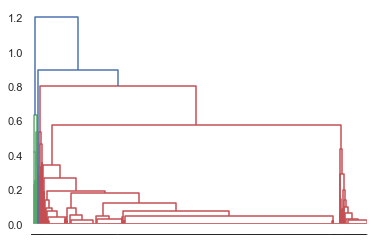

In [24]:
dendro1 = hierarchy.dendrogram(t1, leaf_rotation=0, leaf_font_size = 2)

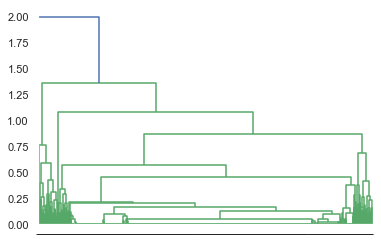

In [25]:
dendro2 = hierarchy.dendrogram(t2, leaf_rotation=0, leaf_font_size = 2)

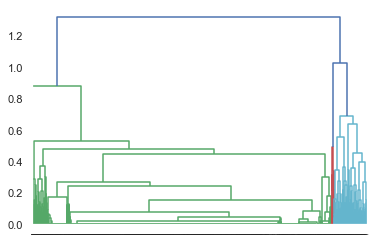

In [26]:
#plt.figure(figsize=(10,6))
dendro3 = hierarchy.dendrogram(t3, leaf_rotation=0, leaf_font_size = 2)

#### DBSCAN

To find associations (structure) in the data that are hard to find manually and that can be meaningful for predicting trends.

It groups together point based on an euclidean distance and a density parameter. Points in low density are marked as outliers.

The _eps_ parameter refers to density, neighbor points with equal or less than eps value are grouped in the same cluster. The eps can be fine tuned with a k-distance graph. In general, small eps are preferred.

The _minPoints_ is the minimum number of points to make a dense region. _minPoints_ can be derived from a number of dimensions (D), where midPoints >= D+1. Min should be 3 and for larger datasets use larger minPoints.

It does not need to define the number of clusters before hand, however, as it works based on desity it is affected by variable densities in the groups.

#### Calculating the density parameter

In [27]:
X1_dbscan = alignment1[['hdTotal']]
X2_dbscan = alignment2[['hdTotal']]
X3_dbscan = alignment3[['hdTotal']]

In [28]:
Y1 = alignment1.sequenceNames
Y2 = alignment2.sequenceNames
Y3 = alignment3.sequenceNames

In [29]:
print(X1_dbscan.shape, Y1.shape)
print(X2_dbscan.shape, Y2.shape)
print(X3_dbscan.shape, Y3.shape)

(1575, 1) (1575,)
(1884, 1) (1884,)
(1506, 1) (1506,)


In [30]:
X1_1 = X1_dbscan.values.reshape(-1,)
X2_2 = X2_dbscan.values.reshape(-1,)
X3_3 = X3_dbscan.values.reshape(-1,)

In [31]:
X1_1.shape

(1575,)

In [32]:
t1 = DBSCAN(eps=2.0, min_samples=4, metric='euclidean')
t1.fit(X1_dbscan)
y1_pred = t1.fit_predict(X1_dbscan)

In [33]:
t2 = DBSCAN(eps=2.0, min_samples=4, metric='euclidean')
t2.fit(X2_dbscan)
y2_pred = t2.fit_predict(X2_dbscan)

In [34]:
t3 = DBSCAN(eps=2.0, min_samples=4, metric='euclidean')
t3.fit(X3_dbscan)
y3_pred = t3.fit_predict(X3_dbscan)

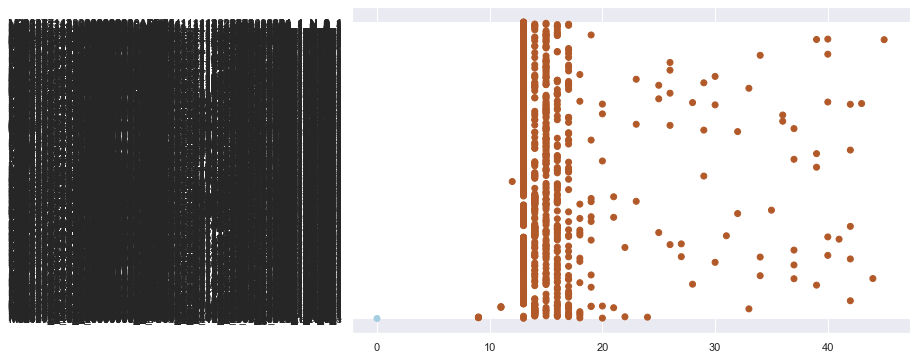

In [35]:
plt.figure(figsize=(10,6))
plt.scatter(X1_1, Y1, c = y1_pred, cmap = 'Paired')

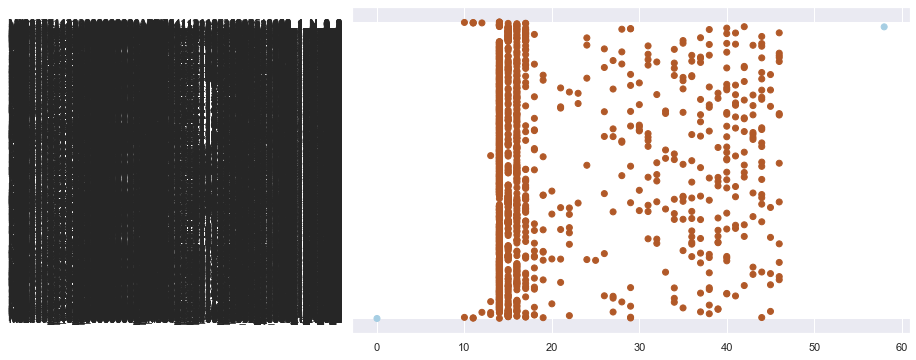

In [36]:
plt.figure(figsize=(10,6))
plt.scatter(X2_2, Y2, c = y2_pred, cmap = 'Paired')

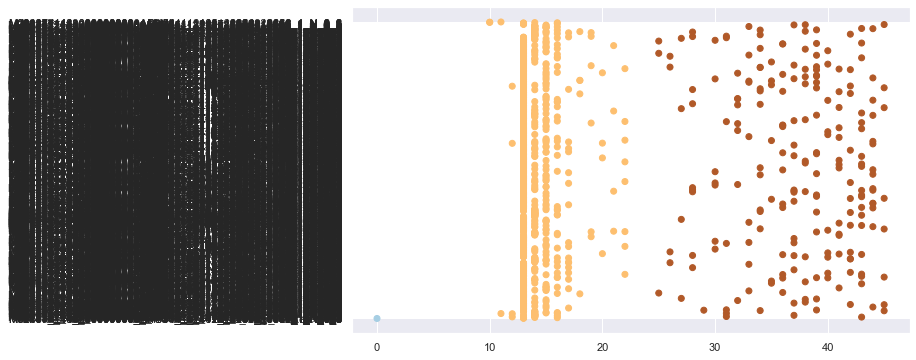

In [44]:
plt.figure(figsize=(10,6))
plt.scatter(X3_3, Y3, c = y3_pred, cmap = 'Paired')

The sequence names are very long and cannot be read, however I am interested at the distribution pattern